In [1]:
import os.path
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
image_dir = "/Users/mykko/Documents/project/decision/data/videos_images/"
video_name = "video1"
image_name = "00000140.jpg"

In [3]:
image_path = os.path.join(image_dir, video_name, image_name)

In [4]:
src = cv2.imread(image_path)

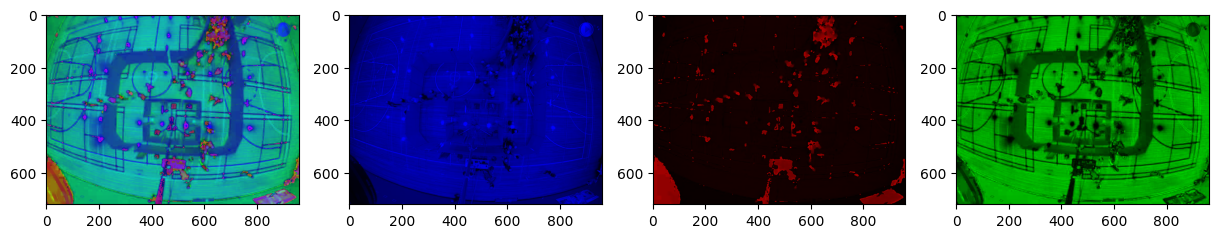

In [17]:
HSV = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
hsl_img_1 = HSV.copy()
hsl_img_2 = HSV.copy()
hsl_img_3 = HSV.copy()
hsl_img_1[:,:,0] = 0  #### HUE --> ZERO  ####
hsl_img_1[:,:,1] = 0
hsl_img_2[:,:,1] = 0  #### SATURATION --> ZERO ####
hsl_img_2[:,:,2] = 0
hsl_img_3[:,:,0] = 0  #### LIGHTNESS --> ZERO ####
hsl_img_3[:,:,2] = 0

f, axes = plt.subplots(1,4, figsize = (15,15))
list = [HSV, hsl_img_1,hsl_img_2,hsl_img_3]
i = 0
for ax in axes:
    # temp = list[i][:,:,::-1]
    ax.imshow(list[i])
    i+=1

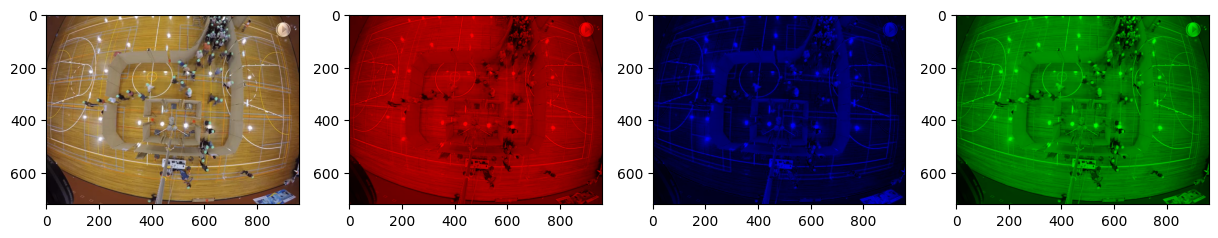

In [15]:
new_img_1 = src.copy()
new_img_2 = src.copy()
new_img_3 = src.copy()
new_img_1[:,:,0] = 0 # making R channel zero    ####For BLUE channel#####
new_img_1[:,:,1] = 0 #making G channel zero
new_img_2[:,:,1] = 0####For RED color Channel####
new_img_2[:,:,2] = 0
new_img_3[:,:,0] = 0###For GREEN Channel####
new_img_3[:,:,2] = 0

f, axes = plt.subplots(1,4, figsize = (15,15))
list = [src, new_img_1,new_img_2,new_img_3]
i = 0
for ax in axes:
    temp = list[i][:,:,::-1]
    ax.imshow(temp)
    i+=1

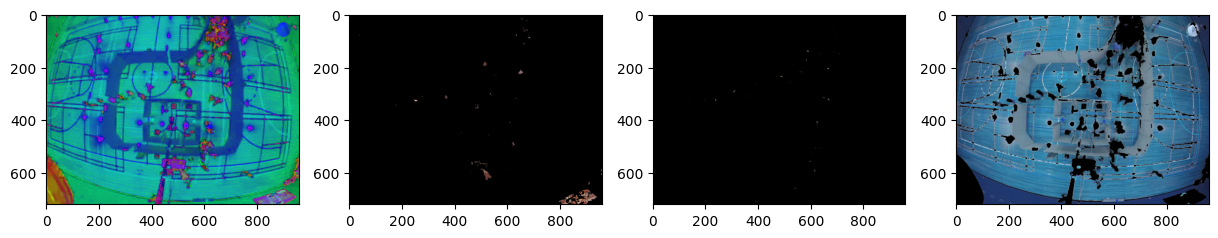

In [18]:
# 确定蓝色、绿色、红色区域
minBlue = np.array([110, 50, 50])
maxBlue = np.array([130, 255, 255])
minGreen = np.array([50, 50, 50])
maxGreen = np.array([70, 255, 255])
minRed = np.array([0, 50, 50])
maxRed = np.array([30, 255, 255])

# 通过掩码控制的按位与运算，锁定蓝色、绿色、红色区域
mask = cv2.inRange(HSV, minBlue, maxBlue)
blue = cv2.bitwise_and(src, src, mask=mask)
mask = cv2.inRange(HSV, minGreen, maxGreen)
green = cv2.bitwise_and(src, src, mask=mask)
mask = cv2.inRange(HSV, minRed, maxRed)
red = cv2.bitwise_and(src, src, mask=mask)

f, axes = plt.subplots(1,4, figsize = (15,15))
list = [HSV, blue,green,red]
i = 0
for ax in axes:
    # temp = list[i][:,:,::-1]
    ax.imshow(list[i])
    i+=1
# 展示各个标记指定的颜色图像